In [4]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

C:\Users\Ali\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
data = pd.read_csv('yelp.csv')
data

,business_id,date,review_id,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,26-01-2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,27-07-2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,14-06-2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,27-05-2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,05-01-2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,28-07-2012,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,18-01-2012,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,16-11-2010,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,02-12-2012,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [6]:
avg_stars = statistics.mean(data.stars)
avg_stars

3.7775

In [7]:
    #adding length column for length of text review
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,26-01-2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,27-07-2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,14-06-2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,27-05-2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,05-01-2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [8]:
data_classes = data[(data['stars']==1) |(data['stars']==3)| (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

X = data_classes['text']
Y = data_classes['stars']
print(X.head())
print(Y.head())

(5547, 10)
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


Text(0, 0.5, 'Frequency')

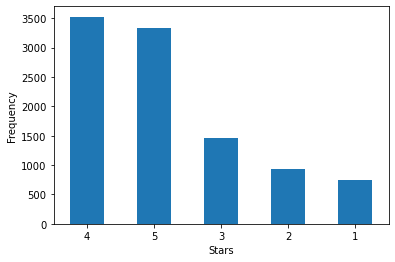

In [9]:
count_classes = pd.value_counts(data['stars'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(5))
plt.xlabel("Stars")
plt.ylabel("Frequency")

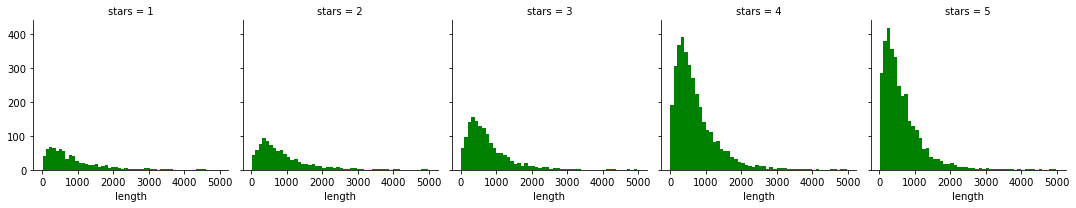

In [10]:
#correlation between stars and legth of text
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='green')

In [8]:
#correlation of voting columns
#mean of voting columns with respect to stars
star_voting = data.groupby('stars').mean()
star_voting

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [9]:
star_voting.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


# Negative corr between Cool - useful, cool - funny and cool - length which means reviews marked as cool is not useful and short
# Positive corr between funny-useful, funny-length and useful-length which means longer reviews tend to be useful and funny.

In [10]:
import nltk 
from nltk.corpus import stopwords
import string

In [11]:
#converting input to lower case
lower_case_documents = []
for i in X:
    lower_case_documents.append(i.lower())

lower_case_documents[:1]

['my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.\n\ndo yourself a favor and get their bloody mary.  it was phenomenal and simply the best i\'ve ever had.  i\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.\n\nwhile everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i\'ve ever had.\n\nanyway, i can\'t wait to go back!']

In [12]:
#removing punctuation
sans_punctuation_documents = []
for i in lower_case_documents:
    transMap = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    sans_punctuation_documents.append(i.translate(transMap))

sans_punctuation_documents[:1]

['my wife took me here on my birthday for breakfast and it was excellent   the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   our waitress was excellent and our food arrived quickly on the semi busy saturday morning   it looked like the place fills up pretty quickly so the earlier you get here the better \n\ndo yourself a favor and get their bloody mary   it was phenomenal and simply the best i ve ever had   i m pretty sure they only use ingredients from their garden and blend them fresh when you order it   it was amazing \n\nwhile everything on the menu looks excellent  i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete   it was the best  toast  i ve ever had \n\nanyway  i can t wait to go back ']

In [13]:
#tokenization
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split())

preprocessed_documents[:55]

[['my',
  'wife',
  'took',
  'me',
  'here',
  'on',
  'my',
  'birthday',
  'for',
  'breakfast',
  'and',
  'it',
  'was',
  'excellent',
  'the',
  'weather',
  'was',
  'perfect',
  'which',
  'made',
  'sitting',
  'outside',
  'overlooking',
  'their',
  'grounds',
  'an',
  'absolute',
  'pleasure',
  'our',
  'waitress',
  'was',
  'excellent',
  'and',
  'our',
  'food',
  'arrived',
  'quickly',
  'on',
  'the',
  'semi',
  'busy',
  'saturday',
  'morning',
  'it',
  'looked',
  'like',
  'the',
  'place',
  'fills',
  'up',
  'pretty',
  'quickly',
  'so',
  'the',
  'earlier',
  'you',
  'get',
  'here',
  'the',
  'better',
  'do',
  'yourself',
  'a',
  'favor',
  'and',
  'get',
  'their',
  'bloody',
  'mary',
  'it',
  'was',
  'phenomenal',
  'and',
  'simply',
  'the',
  'best',
  'i',
  've',
  'ever',
  'had',
  'i',
  'm',
  'pretty',
  'sure',
  'they',
  'only',
  'use',
  'ingredients',
  'from',
  'their',
  'garden',
  'and',
  'blend',
  'them',
  'fresh',

In [14]:
def text_process(preprocessed_documents):
    nopunc = [char for char in preprocessed_documents if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer(analyzer= text_process).fit(X)
print(len(vocab.vocabulary_))

31336


In [16]:
x = vocab.transform(X)

In [17]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(x,Y)

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=101)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [21]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Accuracy:",(accuracy_score(y_test,predmnb)*100))
print("Classification Report:")
print(classification_report(y_test,predmnb))

Confusion Matrix Multinomial Naive Bayes:
[[148   2   0]
 [ 91  66   3]
 [ 41  60  39]]
Accuracy: 56.222222222222214
Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.99      0.69       150
           3       0.52      0.41      0.46       160
           5       0.93      0.28      0.43       140

    accuracy                           0.56       450
   macro avg       0.66      0.56      0.53       450
weighted avg       0.65      0.56      0.53       450



In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print("Confusion Matrix Random Forest Classifier:")
print(confusion_matrix(y_test,predrf))
print("Accuracy:",(accuracy_score(y_test,predrf)*100))
print("Classification Report:")
print(classification_report(y_test,predrf))

Confusion Matrix Random Forest Classifier:
[[105  24  21]
 [ 18  91  51]
 [  2   6 132]]
Accuracy: 72.88888888888889
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       150
           3       0.75      0.57      0.65       160
           5       0.65      0.94      0.77       140

    accuracy                           0.73       450
   macro avg       0.75      0.74      0.73       450
weighted avg       0.75      0.73      0.72       450



In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt = DT.predict(x_test)
print("confusion matrix Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Accuracy:",(accuracy_score(y_test,preddt)*100))
print("classfication report:")
print(classification_report(y_test,preddt))

confusion matrix Decision Tree:
[[ 99  36  15]
 [ 38  80  42]
 [ 12  20 108]]
Accuracy: 63.77777777777778
classfication report:
              precision    recall  f1-score   support

           1       0.66      0.66      0.66       150
           3       0.59      0.50      0.54       160
           5       0.65      0.77      0.71       140

    accuracy                           0.64       450
   macro avg       0.64      0.64      0.64       450
weighted avg       0.63      0.64      0.63       450



In [24]:
#Support Vector Machine 
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("confusion matrix SVM:")
print(confusion_matrix(y_test,predsvm))
print("Accuracy:",(accuracy_score(y_test,predsvm)*100))
print("Classification Report:")
print(classification_report(y_test,predsvm))

confusion matrix SVM:
[[109  16  25]
 [ 14 106  40]
 [  0   6 134]]
Accuracy: 77.55555555555556
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.73      0.80       150
           3       0.83      0.66      0.74       160
           5       0.67      0.96      0.79       140

    accuracy                           0.78       450
   macro avg       0.80      0.78      0.78       450
weighted avg       0.80      0.78      0.77       450



In [25]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Accuracy:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:")
print(classification_report(y_test,predgbi))

Confusion Matrix Gradient Boosting Classifier:
[[112  16  22]
 [ 26  93  41]
 [  2  19 119]]
Accuracy: 72.0
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.75      0.77       150
           3       0.73      0.58      0.65       160
           5       0.65      0.85      0.74       140

    accuracy                           0.72       450
   macro avg       0.73      0.73      0.72       450
weighted avg       0.73      0.72      0.72       450



In [26]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Accuracy: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix K Neighbors Classifier:
[[ 15   7 128]
 [  4   6 150]
 [  0   0 140]]
Accuracy:  35.78
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.10      0.18       150
           3       0.46      0.04      0.07       160
           5       0.33      1.00      0.50       140

    accuracy                           0.36       450
   macro avg       0.53      0.38      0.25       450
weighted avg       0.53      0.36      0.24       450



In [27]:
#XGBoost classifier
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Accuracy: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for XGBoost Classifier:
[[115  20  15]
 [ 26 103  31]
 [  4  13 123]]
Accuracy:  75.78
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78       150
           3       0.76      0.64      0.70       160
           5       0.73      0.88      0.80       140

    accuracy                           0.76       450
   macro avg       0.76      0.76      0.76       450
weighted avg       0.76      0.76      0.76       450



In [28]:
#multilayer perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Accuracy:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[115  22  13]
 [ 28  96  36]
 [  6  16 118]]
Accuracy: 73.11
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.77      0.77       150
           3       0.72      0.60      0.65       160
           5       0.71      0.84      0.77       140

    accuracy                           0.73       450
   macro avg       0.73      0.74      0.73       450
weighted avg       0.73      0.73      0.73       450



# Prediction of star ratings 

In [46]:
#multilayer perceptron
pre = data['text'][258]
print(pre)
print("Actual Rating: ",data['stars'][258])
pre_t = vocab.transform([pre])
print("Predicted Rating:",mlp.predict(pre_t)[0])

We started each morning of our vacation at The Breakfast Club.  Everything was so tasty; juices are fresh-squeezed.  Menu has quite a variety and portions are very filling  It gets busy early.  Be sure to give it a try.
Actual Rating:  5
Predicted Rating: 5


In [31]:
#multinomail naive bayes
pre = data['text'][35]
print(pre)
print("Actual Rating: ",data['stars'][35])
pre_t = vocab.transform([pre])
print("Predicted Rating:")
mnb.predict(pre_t)[0]

I've eaten here many times, but none as bad as last night.
Service was excellent, and highly attentive.
Food, absolutely horrible.

My expectation was they would serve a steak on par with their seafood. After all, they were charging 39 bucks for a ribeye. 
What I was hoping for was a 1- 1-1/2' thick steak, cooked Pittsburgh style as I had ordered. 
What I got a a 3/4 in thick piece of meat that was mostly fat, gristle, and in no way resembled Pittsburgh Style. 
Salad, similar to something you could get at Chick Filet
Veggies, blah.
Bread basket, ample, but day old, and if not, it certainly wasn't fresh. 

In addition to bad food, we were crammed into a small room where we were nuts to butts with 6 other tables, listening to conversations ranging from someone's recent bout with pinkeye, and another couple who elected to speak entirely in French, until the waiter showed up, then it was like they turned off the French switch and suddenly began speaking English. 

I've had it with this pla

1

In [31]:
#support vector classifier
pre = data['text'][322]
print(pre)
print("Actual Rating: ",data['stars'][322])
pre_t = vocab.transform([pre])
print("Predicted Rating:",svm.predict(pre_t)[0])

I know I enjoy food when I think about how good it was later..like days and days later. It has been about a week and I am still craving the Mac n' Cheese I inhaled during my Happy Hour visit. The Macaroni was cooked to perfection, the cheese was the perfect consistency and texture, and the addition of spicy sausage really set the dish apart. 

While the service was impossibly slow, every waiter I came in contact with was extremely nice. But nice or not, I was sucking on melted ice for half the night while I waited to get my drinks refilled. No bueno. 

The atmosphere was relaxing and casual, and the bathrooms were fabulous!! Well lit, great aroma, and my choice between cloth hand towels or paper. The bathroom had well placed mirrors which made the space feel big and clean.

I will definitely come back, but next time I might sneak in my own drink.
Actual Rating:  3
Predicted Rating: 3


In [32]:
#xgboost
pre = data['text'][34]
print(pre)
print("Actual Rating: ",data['stars'][34])
pre_t = vocab.transform([pre])
print("Predicted Rating:",xgb.predict(pre_t)[0])

There's two ways to look at this place. One is getting quality food at a good price. The other is getting a lot of food for a cheap price. I prefer the former but those who prefer the latter won't agree with my review.

I thought the scramble I had was okay but nothing fantastic. I definitely didn't care for the biscuits. The food wasn't health conscious at all but if you're looking to fill up with calories and get a good-sized portion then this is your type of place. Also, I am not a fan of the diner-type ambiance... I would rather have something with more character but I'm glad I tried this place out.
Actual Rating:  3
Predicted Rating: 3


In [33]:
#gradient boost
pre = data['text'][34]
print(pre)
print("Actual Rating: ",data['stars'][34])
pre_t = vocab.transform([pre])
print("Predicted Rating:",gbi.predict(pre_t)[0])

There's two ways to look at this place. One is getting quality food at a good price. The other is getting a lot of food for a cheap price. I prefer the former but those who prefer the latter won't agree with my review.

I thought the scramble I had was okay but nothing fantastic. I definitely didn't care for the biscuits. The food wasn't health conscious at all but if you're looking to fill up with calories and get a good-sized portion then this is your type of place. Also, I am not a fan of the diner-type ambiance... I would rather have something with more character but I'm glad I tried this place out.
Actual Rating:  3
Predicted Rating: 3


In [34]:
#random forest
pre = data['text'][351]
print(pre)
print("Actual Rating: ",data['stars'][351])
pre_t = vocab.transform([pre])
print("Predicted Rating:",rf.predict(pre_t)[0])

It's not hard to find a steakhouse in Scottsdale.  Modern Steak's schtick is that it is... well, "modern" in the sense that it's not in a dark oak-filled room with overstuffed booths.  Unfortunately, however, "modern" also means that it's in a mall.  Ugh.

Pretty efficient (if not brusque) service, with decent enough food.  I had the salmon w/ maple and bacon glaze.  It's a bit of a bizarre combo -- I'm not sure the salmon quite holds up under such a sweet glaze, but you can't complain too much anytime bacon is involved :)
Actual Rating:  3
Predicted Rating: 3


Comparing classifiers performance metrics

In [35]:
names = ["Multi_Naive_bayes","Random_forest","Decision_tree","SVM","Gradient_boost","KNN","XG_Boost","Multilayer_perceptron"]

classifiers = [
    MultinomialNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(random_state=101),
    GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999),
    KNeighborsClassifier(n_neighbors=10),
    XGBClassifier(),
    MLPClassifier()]

In [36]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train,y_train)
    score = clf.score(x_test,y_test)
    scores.append(score*100)

In [37]:
scores

[56.222222222222214,
 74.22222222222223,
 62.66666666666667,
 77.55555555555556,
 72.0,
 35.77777777777777,
 75.77777777777777,
 73.77777777777777]

In [38]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores 
df

,name,score
0,Multi_Naive_bayes,56.222222
1,Random_forest,74.222222
2,Decision_tree,62.666667
3,SVM,77.555556
4,Gradient_boost,72.000000
5,KNN,35.777778
6,XG_Boost,75.777778
7,Multilayer_perceptron,73.777778


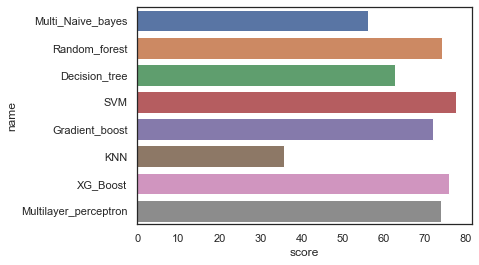

In [39]:
sns.set(style="white")
ax = sns.barplot(y="name", x="score", data=df)